In [6]:
%run ../../utils/commonImports.py
%matplotlib inline

# Load Data

In [7]:
X_train, y_train, X_val, y_val, X_test, y_test = load_split('D:\\Dropbox\\My work\\krypl-project\\dataSplit\\03-candle-shape-sg')

# Test Train Validation Split

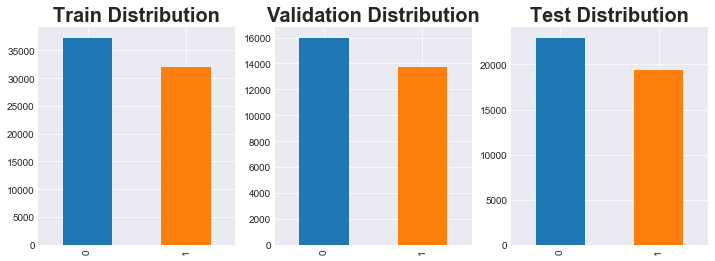

In [8]:
fig, axes = plt.subplots(1, 3, figsize=[12, 4])
y_train.value_counts().plot(kind='bar', ax=axes[0])
axes[0].set_title('Train Distribution', fontproperties=title_font)
y_val.value_counts().plot(kind='bar', ax=axes[1])
axes[1].set_title('Validation Distribution', fontproperties=title_font)
y_test.value_counts().plot(kind='bar', ax=axes[2])
axes[2].set_title('Test Distribution', fontproperties=title_font);

In [9]:
X_train.describe()

,close_high_ratio_zscore288,open_high_ratio_zscore288,low_high_ratio_zscore288,open_close_ratio_zscore288,close_high_ratio_zscore288_lag_1,close_high_ratio_zscore288_lag_2,close_high_ratio_zscore288_lag_3,close_high_ratio_zscore288_lag_4,close_high_ratio_zscore288_lag_5,close_high_ratio_zscore288_lag_6,...,low_high_ratio_zscore288_lag_9,open_close_ratio_zscore288_lag_1,open_close_ratio_zscore288_lag_2,open_close_ratio_zscore288_lag_3,open_close_ratio_zscore288_lag_4,open_close_ratio_zscore288_lag_5,open_close_ratio_zscore288_lag_6,open_close_ratio_zscore288_lag_7,open_close_ratio_zscore288_lag_8,open_close_ratio_zscore288_lag_9
count,"69,289.0000","69,289.0000","69,289.0000","69,289.0000","69,289.0000","69,289.0000","69,289.0000","69,289.0000","69,289.0000","69,289.0000",...,"69,289.0000","69,289.0000","69,289.0000","69,289.0000","69,289.0000","69,289.0000","69,289.0000","69,289.0000","69,289.0000","69,289.0000"
mean,-0.0093,-0.0123,-0.0054,0.0022,-0.0090,-0.0078,-0.0065,-0.0076,-0.0069,-0.0099,...,-0.0079,0.0006,0.0001,-0.0007,0.0011,-0.0001,-0.0007,0.0009,0.0044,0.0024
std,1.0915,1.0947,1.1236,1.0564,1.0882,1.0874,1.0822,1.0903,1.0875,1.0878,...,1.1148,1.0520,1.0572,1.0485,1.0538,1.0545,1.0537,1.0572,1.0516,1.0536
min,-16.5812,-19.5263,-15.5778,-14.9613,-27.7103,-19.6700,-17.3853,-19.6700,-16.5812,-19.6700,...,-14.6473,-14.9613,-17.7256,-14.9613,-14.9613,-14.9613,-14.9613,-14.9613,-17.7256,-17.7256
25%,-0.4855,-0.4940,-0.4807,-0.5742,-0.4830,-0.4803,-0.4797,-0.4843,-0.4855,-0.4878,...,-0.4804,-0.5756,-0.5764,-0.5799,-0.5748,-0.5734,-0.5758,-0.5720,-0.5701,-0.5715
50%,0.2140,0.1969,0.2032,-0.0140,0.2098,0.2081,0.2135,0.2130,0.2133,0.2079,...,0.2012,-0.0112,-0.0137,-0.0163,-0.0152,-0.0117,-0.0143,-0.0121,-0.0116,-0.0125
75%,0.6935,0.6937,0.7093,0.5575,0.6918,0.6928,0.6923,0.6955,0.6962,0.6919,...,0.7042,0.5553,0.5558,0.5550,0.5584,0.5537,0.5560,0.5557,0.5579,0.5558
max,3.7825,3.2401,3.0126,15.8543,3.7825,3.7825,3.7825,3.4381,3.7825,3.7825,...,3.2700,14.3565,20.9074,15.8543,20.9074,15.8543,20.9074,20.9074,15.8543,20.9074


# Decision Tree

In [10]:
import time
from modeling.gridsearch import GridSearch
from sklearn.tree import DecisionTreeClassifier

params_to_train = {
    'max_depth': [5, 8, 10, 12, 15, 18, 20],
    'min_samples_split': [10, 30, 50],
    'class_weight': ['balanced']
}

grid_search = GridSearch(DecisionTreeClassifier, params_to_train)
grid_search.fit_all(X_train, y_train)

path = "D:\\Dropbox\\My work\\krypl-project\\models\\03-candle-shape-sg"
save_model(grid_search, f'{path}\\tree_search.pkl');

train [0/21] {'max_depth': 5, 'min_samples_split': 10, 'class_weight': 'balanced'}........................... 1.82 sec
train [1/21] {'max_depth': 5, 'min_samples_split': 30, 'class_weight': 'balanced'}........................... 1.75 sec
train [2/21] {'max_depth': 5, 'min_samples_split': 50, 'class_weight': 'balanced'}........................... 2.53 sec
train [3/21] {'max_depth': 8, 'min_samples_split': 10, 'class_weight': 'balanced'}........................... 3.59 sec
train [4/21] {'max_depth': 8, 'min_samples_split': 30, 'class_weight': 'balanced'}........................... 3.74 sec
train [5/21] {'max_depth': 8, 'min_samples_split': 50, 'class_weight': 'balanced'}........................... 4.15 sec
train [6/21] {'max_depth': 10, 'min_samples_split': 10, 'class_weight': 'balanced'}........................... 5.19 sec
train [7/21] {'max_depth': 10, 'min_samples_split': 30, 'class_weight': 'balanced'}........................... 3.65 sec
train [8/21] {'max_depth': 10, 'min_samples_sp